<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python Mini-Project
### Digital Vidya Copyright

### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are methods available to extract features that will be covered in upcoming sessions but it's very important to build the intuition. The process of data cleaning and visualization helps with that. In this assignment, we will try to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

Load the Lending Club data into a pandas dataframe. The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

We strongly recommend that you look in to the columns closely to see the relationship between them. This is not a guided assignment and you can use the techniques that you have learnt so far to clean and visualize the data. 

There is no one right answer but this tests your ability to handle a much larger unknown dataset.

Here are the broad guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df = pd.read_csv('C:\\Users\\SHUBHA\\Desktop\\Session-1-Introduction-To-Data-Analytics-Assignment\\Assignmnet 10\\LoanStats3a.csv')
df.head()

C:\Users\SHUBHA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Cleaning the data
df = df.drop(['id','member_id','url','out_prncp', 'out_prncp', 'next_pymnt_d','collections_12_mths_ex_med','mths_since_last_major_derog'], axis=1)
df = df.drop(['annual_inc_joint','dti_joint', 'verification_status_joint', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','open_acc_6m', 'open_act_il'],axis = 1)
df = df.drop(['open_il_12m', 'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util', 'open_rv_12m', 'open_rv_24m','max_bal_bc'],axis=1)
df = df.drop(['all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy'],axis=1)
df= df.drop(['bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
            'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
             'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
             'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
             'pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
             'revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
             'sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med',
             'sec_app_mths_since_last_major_derog','hardship_flag','hardship_type','hardship_reason','hardship_status','deferral_term',
             'hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd',
             'hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
             'debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term'],axis=1)
df1= df.drop(['pymnt_plan','initial_list_status','out_prncp_inv'],axis=1)
#df.to_csv('D:/loan1.csv')
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.00,0.0000,Jan-15,171.62,Nov-18,1.0,Individual,0.0,Cash,N
1,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,122.90,1.1100,Apr-13,119.66,Oct-16,1.0,Individual,0.0,Cash,N
2,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.00,0.0000,Jun-14,649.91,Jun-17,1.0,Individual,0.0,Cash,N
3,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.0000,Jan-15,357.48,Apr-16,1.0,Individual,0.0,Cash,N
4,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.00,0.0000,Jan-17,67.30,Apr-18,1.0,Individual,0.0,Cash,N
5,5000.0,5000.0,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.0000,Jan-15,161.03,Feb-17,1.0,Individual,0.0,Cash,N
6,7000.0,7000.0,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.0000,May-16,1313.76,Sep-16,1.0,Individual,0.0,Cash,N
7,3000.0,3000.0,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,0.00,0.0000,Jan-15,111.34,Dec-14,1.0,Individual,0.0,Cash,N
8,5600.0,5600.0,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,...,190.54,2.0900,Apr-12,152.39,Oct-16,1.0,Individual,0.0,Cash,N
9,5375.0,5375.0,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,277.69,2.5200,Nov-12,121.45,Dec-16,1.0,Individual,0.0,Cash,N


In [49]:
#Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
df1.term=df1.term.str.extract('(\d+)').astype('float')
df1.int_rate=df1.int_rate.str.rstrip('%').astype('float')
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36.0,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.0000,Jan-15,171.62,Nov-18,1.0,Individual,0.0,Cash,N
1,2500.0,2500.0,2500.00000,60.0,15.27,59.83,C,C4,Ryder,< 1 year,...,122.90,1.1100,Apr-13,119.66,Oct-16,1.0,Individual,0.0,Cash,N
2,2400.0,2400.0,2400.00000,36.0,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.0000,Jun-14,649.91,Jun-17,1.0,Individual,0.0,Cash,N
3,10000.0,10000.0,10000.00000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.0000,Jan-15,357.48,Apr-16,1.0,Individual,0.0,Cash,N
4,3000.0,3000.0,3000.00000,60.0,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.0000,Jan-17,67.30,Apr-18,1.0,Individual,0.0,Cash,N
5,5000.0,5000.0,5000.00000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.0000,Jan-15,161.03,Feb-17,1.0,Individual,0.0,Cash,N
6,7000.0,7000.0,7000.00000,60.0,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.0000,May-16,1313.76,Sep-16,1.0,Individual,0.0,Cash,N
7,3000.0,3000.0,3000.00000,36.0,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.00,0.0000,Jan-15,111.34,Dec-14,1.0,Individual,0.0,Cash,N
8,5600.0,5600.0,5600.00000,60.0,21.28,152.39,F,F2,NaN,4 years,...,190.54,2.0900,Apr-12,152.39,Oct-16,1.0,Individual,0.0,Cash,N
9,5375.0,5375.0,5350.00000,60.0,12.69,121.45,B,B5,Starbucks,< 1 year,...,277.69,2.5200,Nov-12,121.45,Dec-16,1.0,Individual,0.0,Cash,N


In [50]:
#Cleaning the Data:We found some records with a loan_status of "Does not meet the credit policy". We believe these may be older loans that would simply 
#not be accepted under LendingClubs current criteria. As these data points will provide no value moving forward, exluded them from our data. 
df1 = pd.DataFrame(df1[df1['loan_status'] != "Does not meet the credit policy. Status:Fully Paid"])
df1 = pd.DataFrame(df1[df1['loan_status'] != "Does not meet the credit policy. Status:Charged Off"])
df1


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36.0,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.0000,Jan-15,171.62,Nov-18,1.0,Individual,0.0,Cash,N
1,2500.0,2500.0,2500.00000,60.0,15.27,59.83,C,C4,Ryder,< 1 year,...,122.90,1.1100,Apr-13,119.66,Oct-16,1.0,Individual,0.0,Cash,N
2,2400.0,2400.0,2400.00000,36.0,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.0000,Jun-14,649.91,Jun-17,1.0,Individual,0.0,Cash,N
3,10000.0,10000.0,10000.00000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.0000,Jan-15,357.48,Apr-16,1.0,Individual,0.0,Cash,N
4,3000.0,3000.0,3000.00000,60.0,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.0000,Jan-17,67.30,Apr-18,1.0,Individual,0.0,Cash,N
5,5000.0,5000.0,5000.00000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.0000,Jan-15,161.03,Feb-17,1.0,Individual,0.0,Cash,N
6,7000.0,7000.0,7000.00000,60.0,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.0000,May-16,1313.76,Sep-16,1.0,Individual,0.0,Cash,N
7,3000.0,3000.0,3000.00000,36.0,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.00,0.0000,Jan-15,111.34,Dec-14,1.0,Individual,0.0,Cash,N
8,5600.0,5600.0,5600.00000,60.0,21.28,152.39,F,F2,NaN,4 years,...,190.54,2.0900,Apr-12,152.39,Oct-16,1.0,Individual,0.0,Cash,N
9,5375.0,5375.0,5350.00000,60.0,12.69,121.45,B,B5,Starbucks,< 1 year,...,277.69,2.5200,Nov-12,121.45,Dec-16,1.0,Individual,0.0,Cash,N


In [52]:
df1=df1[:-7]
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36.0,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.0000,Jan-15,171.62,Nov-18,1.0,Individual,0.0,Cash,N
1,2500.0,2500.0,2500.00000,60.0,15.27,59.83,C,C4,Ryder,< 1 year,...,122.90,1.1100,Apr-13,119.66,Oct-16,1.0,Individual,0.0,Cash,N
2,2400.0,2400.0,2400.00000,36.0,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.0000,Jun-14,649.91,Jun-17,1.0,Individual,0.0,Cash,N
3,10000.0,10000.0,10000.00000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.0000,Jan-15,357.48,Apr-16,1.0,Individual,0.0,Cash,N
4,3000.0,3000.0,3000.00000,60.0,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.0000,Jan-17,67.30,Apr-18,1.0,Individual,0.0,Cash,N
5,5000.0,5000.0,5000.00000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.0000,Jan-15,161.03,Feb-17,1.0,Individual,0.0,Cash,N
6,7000.0,7000.0,7000.00000,60.0,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.0000,May-16,1313.76,Sep-16,1.0,Individual,0.0,Cash,N
7,3000.0,3000.0,3000.00000,36.0,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.00,0.0000,Jan-15,111.34,Dec-14,1.0,Individual,0.0,Cash,N
8,5600.0,5600.0,5600.00000,60.0,21.28,152.39,F,F2,NaN,4 years,...,190.54,2.0900,Apr-12,152.39,Oct-16,1.0,Individual,0.0,Cash,N
9,5375.0,5375.0,5350.00000,60.0,12.69,121.45,B,B5,Starbucks,< 1 year,...,277.69,2.5200,Nov-12,121.45,Dec-16,1.0,Individual,0.0,Cash,N


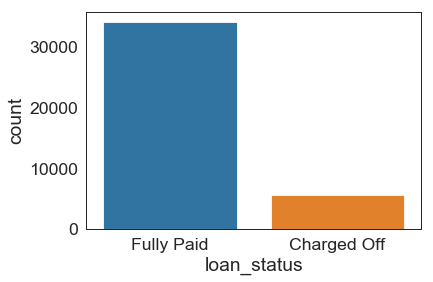

In [61]:
#Loan status
sns.countplot(x='loan_status', data=df1)


In [ ]:
#Summary:
# In the above chart we can see most of the customers loan status is Fully paid.

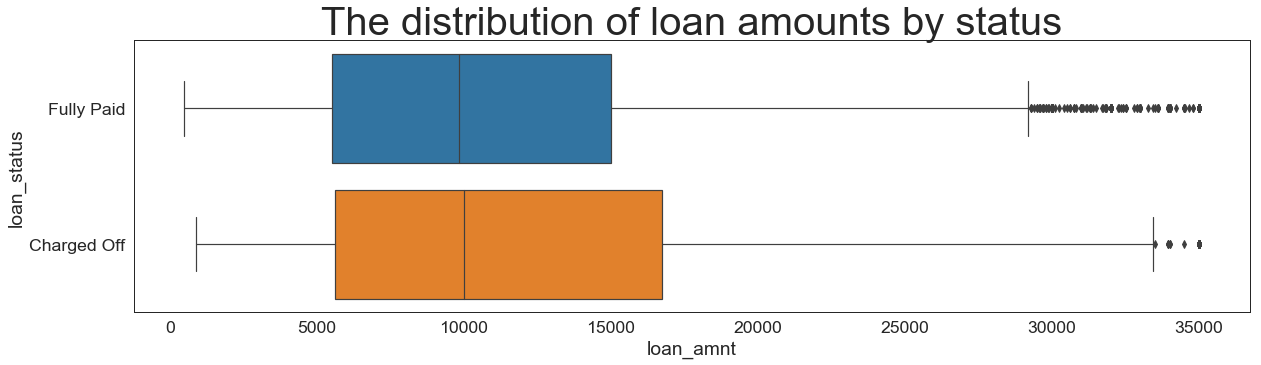

In [67]:
# Loan amount by its status
plt.subplots(figsize=(20,5))
plt.title("The distribution of loan amounts by status").set_size(40)
sns.boxplot(x="loan_amnt", y="loan_status", data=df1)

In [ ]:
#Summary:
#In the above chart we can see Fully Paid loans tend to be smaller compared to charged off.

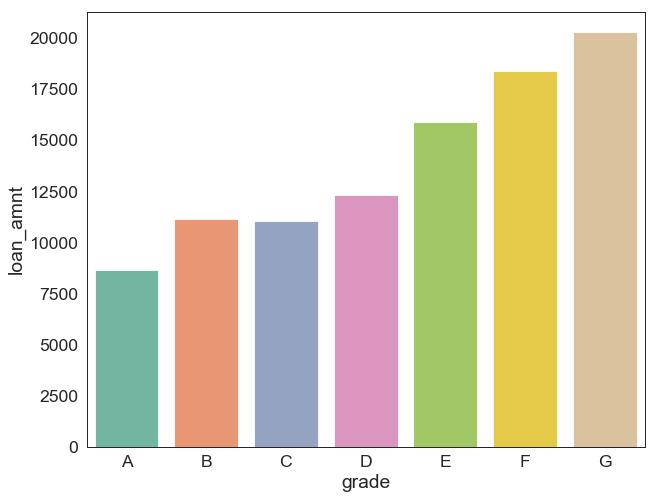

In [74]:
#Loan Status based on grade:
group = df1.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(10,8))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

In [ ]:
#Summary:
#The lower grade, the higher loan amount loan issued

C:\Users\SHUBHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


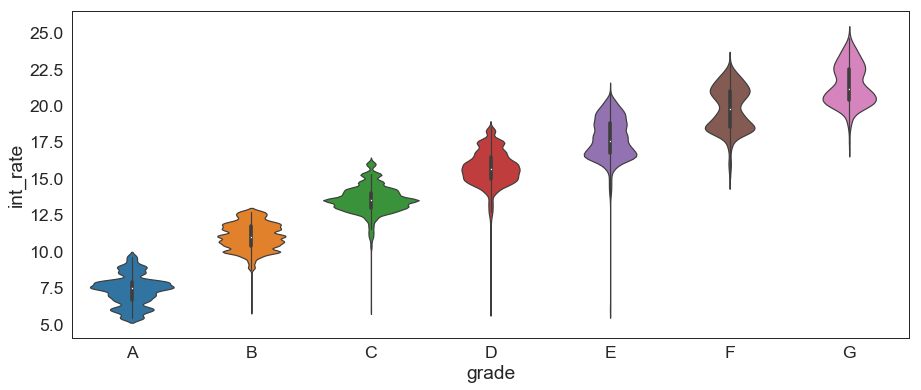

In [76]:
#Interest Rate base on Grade
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=df1, order="ABCDEFG")

In [ ]:
#Summary:
#Grade A has the lowest interest rate around 7%
#Grade G has the highest interest rate above 25%

In [77]:
#Loan status by grade
pd.pivot_table(df1, index="loan_status", columns="grade", aggfunc="size")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1433,1356,1130,725,323,101
Fully Paid,9483,10602,6755,4195,2133,731,217
